<h1><center>CS 464</center></h1>
<h1><center>Introduction to Machine Learning</center></h1>
<h1><center>Spring 2024</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: May 9th, 23:59</center></h3>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions. You should implement programming questions on this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question. <b>Any other programming enviroment will NOT be accepted.</b>
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in both cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells.
    </li>
    <li>
    You are <b>ONLY ALLOWED</b> to use libraries given below:
        <ul>
        <i>>google.colab.drive</i><br>
         <i>>pandas</i><br>
         <i>>numpy</i><br>
         <i>>libraries included in Python standard library (time, os, sys etc.)</i><br>
         <i>>libraries included in PyTorch framework (torch, torchvision etc.)</i><br>
         <i>>PIL.Image</i><br>
         <i>>matplotlib</i>
        </ul>
    </li>
    <li>
    It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    You will submit only a single compressed file for this homework. Compress your notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Section#_Firstname_Lastname. Do not use any Turkish letters for any of your files including code files and model files. Upload your homework to the related section on Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li>
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li>
    For any question regarding this assignment, contact <b>mehmet.yilmaz@bilkent.edu.tr</b> or <b>m.poorghaffar@bilkent.edu.tr</b>.
    </li>
</ul>

## Question 1 Decison Trees [25 pts]

Consider the following dataset:



```
@attribute age 			       {young, pre-presbyopic, presbyopic}
@attribute spectacle-prescrip	 {myope, hypermetrope}
@attribute astigmatism		    {no, yes}
@attribute tear-prod-rate	     {reduced, normal}
@attribute contact-lenses	     {soft, hard, none}

@data
young,myope,no,reduced,none
young,myope,no,normal,soft
young,myope,yes,reduced,none
young,myope,yes,normal,hard
young,hypermetrope,no,reduced,none
young,hypermetrope,no,normal,soft
young,hypermetrope,yes,reduced,none
young,hypermetrope,yes,normal,hard
pre-presbyopic,myope,no,reduced,none
pre-presbyopic,myope,no,normal,soft
pre-presbyopic,myope,yes,reduced,none
pre-presbyopic,myope,yes,normal,hard
pre-presbyopic,hypermetrope,no,reduced,none
pre-presbyopic,hypermetrope,no,normal,soft
pre-presbyopic,hypermetrope,yes,reduced,none
pre-presbyopic,hypermetrope,yes,normal,none
presbyopic,myope,no,reduced,none
presbyopic,myope,no,normal,none
presbyopic,myope,yes,reduced,none
presbyopic,myope,yes,normal,hard
presbyopic,hypermetrope,no,reduced,none
presbyopic,hypermetrope,no,normal,soft
presbyopic,hypermetrope,yes,reduced,none
presbyopic,hypermetrope,yes,normal,none
```


You will train a binary decision tree using information gain as the splitting criteria to predict `contact-lenses` attribute. Consider the following stopping criteria (ie. early pruning criteria): If the entropy of a node is below a predefined threshold, $T$, stop splitting that node, and set it as a leaf.<br>

**Note:** You are not allowed to put scanned images. Hence, you need to use drawing tools such as [draw.io](https://draw.io/), Paint, Microsoft Powerpoint, etc.

**a) [10 pts]** Draw the decision tree that is trained on this dataset without any pruning (i.e. $T=0$). Use <b>ID3 algorithm</b> and <b>entropy</b> as your impurity measure to construct your tree. Show your calculation for each split decision and justify your answer clearly.<br>

**b) [5 pts]** What is GINI index? What will happen if your model utilizes GINI index instead of Entropy?<br>

**c) [5 pts]** When do we say a model is overfitted? How can we make a decision tree less prone to overfitting? (Describe one method)<br>

**d) [5 pts]** Assume you are given a balanced dataset with 2 classes. Based on your knowledge, draw a hypothetical plot to show the change of training and test errors (Y-axis) as $T$ varies from 1 to 0 (X-axis). In addition, show the best range for $T$.<br>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import os

In [ ]:
attribute_names = [
    'age',
    'spectacle-prescrip',
    'astigmatism',
    'tear-prod-rate',
    'contact-lenses'
]

data = [
    ['young', 'myope', 'no', 'reduced', 'none'],
    ['young', 'myope', 'no', 'normal', 'soft'],
    ['young', 'myope', 'yes', 'reduced', 'none'],
    ['young', 'myope', 'yes', 'normal', 'hard'],
    ['young', 'hypermetrope', 'no', 'reduced', 'none'],
    ['young', 'hypermetrope', 'no', 'normal', 'soft'],
    ['young', 'hypermetrope', 'yes', 'reduced', 'none'],
    ['young', 'hypermetrope', 'yes', 'normal', 'hard'],
    ['pre-presbyopic', 'myope', 'no', 'reduced', 'none'],
    ['pre-presbyopic', 'myope', 'no', 'normal', 'soft'],
    ['pre-presbyopic', 'myope', 'yes', 'reduced', 'none'],
    ['pre-presbyopic', 'myope', 'yes', 'normal', 'hard'],
    ['pre-presbyopic', 'hypermetrope', 'no', 'reduced', 'none'],
    ['pre-presbyopic', 'hypermetrope', 'no', 'normal', 'soft'],
    ['pre-presbyopic', 'hypermetrope', 'yes', 'reduced', 'none'],
    ['pre-presbyopic', 'hypermetrope', 'yes', 'normal', 'none'],
    ['presbyopic', 'myope', 'no', 'reduced', 'none'],
    ['presbyopic', 'myope', 'no', 'normal', 'none'],
    ['presbyopic', 'myope', 'yes', 'reduced', 'none'],
    ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
    ['presbyopic', 'hypermetrope', 'no', 'reduced', 'none'],
    ['presbyopic', 'hypermetrope', 'no', 'normal', 'soft'],
    ['presbyopic', 'hypermetrope', 'yes', 'reduced', 'none'],
    ['presbyopic', 'hypermetrope', 'yes', 'normal', 'none']
]

df = pd.DataFrame(data, columns=attribute_names)

### **PART A**

In [ ]:
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(df, feature, target_variable):
    total_entropy = entropy(df[target_variable])
    vals, counts= np.unique(df[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(df.where(df[feature]==vals[i]).dropna()[target_variable]) for i in range(len(vals))])
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [ ]:
entropy_target = entropy(df['contact-lenses'])
print('Entropy of entire dataset (target):', entropy_target)

Entropy of entire dataset (target): 1.3260875253642983


*Entire dataset's target variable (contact-lenses) indicates disorder or impurity in the classes. So, we can start our decision tree.*

In [ ]:
for feature in df.columns.drop('contact-lenses'):
    info_gain = information_gain(df, feature, 'contact-lenses')
    print('Information Gain for', feature, ':', info_gain)

Information Gain for age : 0.03939650364612124
Information Gain for spectacle-prescrip : 0.039510835423565815
Information Gain for astigmatism : 0.3770052300114771
Information Gain for tear-prod-rate : 0.5487949406953985


*A higher information gain indicates that a feature is more important in making the classification*

Hence, tear-prod-rate is our root node.

In [ ]:
df_reduced = df[df['tear-prod-rate'] == 'reduced']
df_normal = df[df['tear-prod-rate'] == 'normal']

In [ ]:
entropy_target = entropy(df_reduced['contact-lenses'])
print('Entropy of data where tear-prod-rate is "reduced":', entropy_target)

Entropy of data where tear-prod-rate is "reduced": -0.0


In [ ]:
print(df_reduced['contact-lenses'])

0     none
2     none
4     none
6     none
8     none
10    none
12    none
14    none
16    none
18    none
20    none
22    none
Name: contact-lenses, dtype: object


If tear-prod-rate is "reduced" then label as none

In [ ]:
entropy_target = entropy(df_normal['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal":', entropy_target)

Entropy of data where tear-prod-rate is "normal": 1.5545851693377997


In [ ]:
for feature in df_normal.columns.drop('contact-lenses'):
    info_gain = information_gain(df_normal, feature, 'contact-lenses')
    print('Information Gain for', feature, ':', info_gain)

Information Gain for age : 0.2212518360044664
Information Gain for spectacle-prescrip : 0.09543725231055511
Information Gain for astigmatism : 0.7704260414863778
Information Gain for tear-prod-rate : 0.0


astigmatism is the following branch if tear-prod-rate is "normal"

Decision Tree up until now:

![picture](https://drive.google.com/uc?id=1uamXlePNVLMPZcEj90kze_IPPWQJD60k)

In [ ]:
df_normal_yes = df_normal[df_normal['astigmatism'] == 'yes']
df_normal_no = df_normal[df_normal['astigmatism'] == 'no']

In [ ]:
entropy_target = entropy(df_normal_yes['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "yes":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "yes": 0.9182958340544896


In [ ]:
for feature in df_normal_yes.columns.drop('contact-lenses'):
    info_gain = information_gain(df_normal_yes, feature, 'contact-lenses')
    print('Information Gain for', feature, ':', info_gain)

Information Gain for age : 0.2516291673878229
Information Gain for spectacle-prescrip : 0.4591479170272448
Information Gain for astigmatism : 0.0
Information Gain for tear-prod-rate : 0.0


In [ ]:
df_normal_yes_myope = df_normal_yes[df_normal_yes['spectacle-prescrip'] == 'myope']
df_normal_yes_hypermetrope = df_normal_yes[df_normal_yes['spectacle-prescrip'] == 'hypermetrope']

In [ ]:
entropy_target = entropy(df_normal_no['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "no":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "no": 0.6500224216483541


In [ ]:
for feature in df_normal_no.columns.drop('contact-lenses'):
    info_gain = information_gain(df_normal_no, feature, 'contact-lenses')
    print('Information Gain for', feature, ':', info_gain)

Information Gain for age : 0.3166890883150208
Information Gain for spectacle-prescrip : 0.19087450462110933
Information Gain for astigmatism : 0.0
Information Gain for tear-prod-rate : 0.0


Decision Tree up until Now:

![picture](https://drive.google.com/uc?id=1m_KzCXQ8wpw_HKXtua88ycjoQjleT2_b)

In [ ]:
entropy_target = entropy(df_normal_yes_myope['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "myope":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "myope": -0.0


In [ ]:
print(df_normal_yes_myope['contact-lenses'])

3     hard
11    hard
19    hard
Name: contact-lenses, dtype: object


In [ ]:
entropy_target = entropy(df_normal_yes_hypermetrope['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope": 0.9182958340544896


In [ ]:
for feature in df_normal_yes_hypermetrope.columns.drop('contact-lenses'):
    info_gain = information_gain(df_normal_yes_hypermetrope, feature, 'contact-lenses')
    print('Information Gain for', feature, ':', info_gain)

Information Gain for age : 0.9182958340544896
Information Gain for spectacle-prescrip : 0.0
Information Gain for astigmatism : 0.0
Information Gain for tear-prod-rate : 0.0


Decision Tree up until Now:

![picture](https://drive.google.com/uc?id=1SWwWvDmwikap2MQeLdrlmhMjeDuQrts5)

In [ ]:
df_normal_yes_hypermetrope_young = df_normal_yes_hypermetrope[df_normal_yes_hypermetrope['age'] == 'young']
df_normal_yes_hypermetrope_prepresbyopic = df_normal_yes_hypermetrope[df_normal_yes_hypermetrope['age'] == 'pre-presbyopic']
df_normal_yes_hypermetrope_presbyopic = df_normal_yes_hypermetrope[df_normal_yes_hypermetrope['age'] == 'presbyopic']

In [ ]:
entropy_target = entropy(df_normal_yes_hypermetrope_young['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope", age is "young":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope", age is "young": -0.0


In [ ]:
print(df_normal_yes_hypermetrope_young['contact-lenses'])

7    hard
Name: contact-lenses, dtype: object


In [ ]:
entropy_target = entropy(df_normal_yes_hypermetrope_prepresbyopic['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope", age is "pre-presbyopic":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope", age is "pre-presbyopic": -0.0


In [ ]:
print(df_normal_yes_hypermetrope_prepresbyopic['contact-lenses'])

15    none
Name: contact-lenses, dtype: object


In [ ]:
entropy_target = entropy(df_normal_yes_hypermetrope_presbyopic['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope", age is "presbyopic":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "yes", spectacle is "hypermetrope", age is "presbyopic": -0.0


In [ ]:
print(df_normal_yes_hypermetrope_presbyopic['contact-lenses'])

23    none
Name: contact-lenses, dtype: object


Decision Tree up until Now:

![picture](https://drive.google.com/uc?id=1kt0tjwFnhTtiagZsA2SNcUAC9ZIkLUnx)

In [ ]:
df_normal_no_young = df_normal_no[df_normal_no['age'] == 'young']
df_normal_no_prepresbyopic = df_normal_no[df_normal_no['age'] == 'pre-presbyopic']
df_normal_no_presbyopic = df_normal_no[df_normal_no['age'] == 'presbyopic']

In [ ]:
entropy_target = entropy(df_normal_no_young['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "young":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "young": -0.0


In [ ]:
print(df_normal_no_young['contact-lenses'])

1    soft
5    soft
Name: contact-lenses, dtype: object


In [ ]:
entropy_target = entropy(df_normal_no_prepresbyopic['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "prepresbyopic":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "prepresbyopic": -0.0


In [ ]:
print(df_normal_no_prepresbyopic['contact-lenses'])

9     soft
13    soft
Name: contact-lenses, dtype: object


In [ ]:
entropy_target = entropy(df_normal_no_presbyopic['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "presbyopic":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "presbyopic": 1.0


In [ ]:
for feature in df_normal_no_presbyopic.columns.drop('contact-lenses'):
    info_gain = information_gain(df_normal_no_presbyopic, feature, 'contact-lenses')
    print('Information Gain for', feature, ':', info_gain)

Information Gain for age : 0.0
Information Gain for spectacle-prescrip : 1.0
Information Gain for astigmatism : 0.0
Information Gain for tear-prod-rate : 0.0


Decision Tree up until Now:

![picture](https://drive.google.com/uc?id=1Q81kX0Sl3aLoGrMesx3SogQUBblArAdE)

In [ ]:
df_normal_no_presbyopic_myope = df_normal_no_presbyopic[df_normal_no_presbyopic['spectacle-prescrip'] == 'myope']
df_normal_no_presbyopic_hypermetrope = df_normal_no_presbyopic[df_normal_no_presbyopic['spectacle-prescrip'] == 'hypermetrope']

In [ ]:
entropy_target = entropy(df_normal_no_presbyopic_myope['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "presbyopic", spectacle-prescript is "myope":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "presbyopic", spectacle-prescript is "myope": -0.0


In [ ]:
print(df_normal_no_presbyopic_myope['contact-lenses'])

17    none
Name: contact-lenses, dtype: object


In [ ]:
entropy_target = entropy(df_normal_no_presbyopic_hypermetrope['contact-lenses'])
print('Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "presbyopic", spectacle-prescript is "hypermetrope":', entropy_target)

Entropy of data where tear-prod-rate is "normal", astigmatism is "no", age is "presbyopic", spectacle-prescript is "hypermetrope": -0.0


In [ ]:
print(df_normal_no_presbyopic_hypermetrope['contact-lenses'])

21    soft
Name: contact-lenses, dtype: object


Last Version of the Decision Tree:

![picture](https://drive.google.com/uc?id=16MixBQzXN4J2N79vZX5aNcDFlbJedzK1)

### **PART B**

Like entropy, the GINI index is a measure of impurity in a set of examples. Impurity refers to how mixed the class labels are within a set.

GINI Index for a set =  1 - Sum(Probability of each class) ^ 2

Range of GINI Index: 0 to 0.5:

*   0 = perfect purity (all examples same class)
*   0.5 = maximum impurity (equal distribution across classes)

The Gini Index calculates the probability of a randomly selected instance being misclassified. The lower the Gini Index, the lesser the probability of misclassification.

Let's utilize GINI Index for our decision tree and see whether it changes.



In [ ]:
def gini_index(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def gini_gain(df, feature, target_variable):
    total_gini = gini_index(df[target_variable])
    vals, counts= np.unique(df[feature], return_counts=True)
    weighted_gini = np.sum([(counts[i]/np.sum(counts)) * gini_index(df.where(df[feature]==vals[i]).dropna()[target_variable]) for i in range(len(vals))])
    gini_gain = total_gini - weighted_gini
    return gini_gain

def build_tree_gini(df, target_variable, threshold):
    if gini_index(df[target_variable]) < threshold:
        return df[target_variable].value_counts().idxmax()

    best_feature = max(df.columns.drop(target_variable), key=lambda f: gini_gain(df, f, target_variable))
    tree = {best_feature: {}}

    for val in np.unique(df[best_feature]):
        subtree = build_tree_gini(df.where(df[best_feature] == val).dropna(), target_variable, threshold)
        tree[best_feature][val] = subtree
    return tree

In [ ]:
tree = build_tree_gini(df, 'contact-lenses', threshold=2e-16)
print(tree)

{'tear-prod-rate': {'normal': {'astigmatism': {'no': {'age': {'pre-presbyopic': 'soft', 'presbyopic': {'spectacle-prescrip': {'hypermetrope': 'soft', 'myope': 'none'}}, 'young': 'soft'}}, 'yes': {'spectacle-prescrip': {'hypermetrope': {'age': {'pre-presbyopic': 'none', 'presbyopic': 'none', 'young': 'hard'}}, 'myope': 'hard'}}}}, 'reduced': 'none'}}


Resulting decision tree by utilizing GINI Index instead of Entropy is same.

![picture](https://drive.google.com/uc?id=1jFHCJ8ziTCZr1sAEvOtHSdhPcCH4jLX-)

 Both metrics fundamentally favor splits that lead to large, pure subsets. Even if there are slight differences in numerical values, the order in which the features are chosen is same for our example.

### **PART C**

Overfitting occurs when a model becomes too closely fitted to the specifics of the training data and fails to capture the underlying patterns that would allow it to generalize well to unseen examples. Signs of overfitting is extremely high accuracy on the training set and significantly lower accuracy on a validation or test set.

In terms of Decision Trees, they are prone to overfitting since decision trees greedily choose the best split at each node without considering future splits. This can lead to overly complex trees with very specific branches. Also, with no limitations, a decision tree can keep splitting until every leaf node has examples of only a single class

We can make it less prone to overfitting by controling the growth of the tree by limiting its maximum depth. By introducing max_depth, at each step of the tree construction, the algorithm checks if the current depth of the node exceeds the max_depth. If it does, the node is not split further, and it becomes a leaf node. Let's try with our case.


In [ ]:
def build_tree_withDepth(df, target_variable, threshold, max_depth, current_depth=0):
    if entropy(df[target_variable]) < threshold or current_depth == max_depth:
        return df[target_variable].value_counts().idxmax()

    best_feature = max(df.columns.drop(target_variable), key=lambda f: information_gain(df, f, target_variable))
    tree = {best_feature: {}}

    for val in np.unique(df[best_feature]):
        subtree = build_tree_withDepth(df.where(df[best_feature] == val).dropna(),
                             target_variable, threshold, max_depth, current_depth + 1)
        tree[best_feature][val] = subtree
    return tree

In [ ]:
tree = build_tree_withDepth(df, 'contact-lenses', threshold=2e-16, max_depth=2) # setting max_depth to 2
print(tree)

{'tear-prod-rate': {'normal': {'astigmatism': {'no': 'soft', 'yes': 'hard'}}, 'reduced': 'none'}}


Resulting Decision Tree with max_depth = 2

![picture](https://drive.google.com/uc?id=1H5cIfNTQsZj4q9TB-lTMw1zCndCEHMXC)

By doing that, we can make our decision tree less prune to overfitting.

### **PART D**

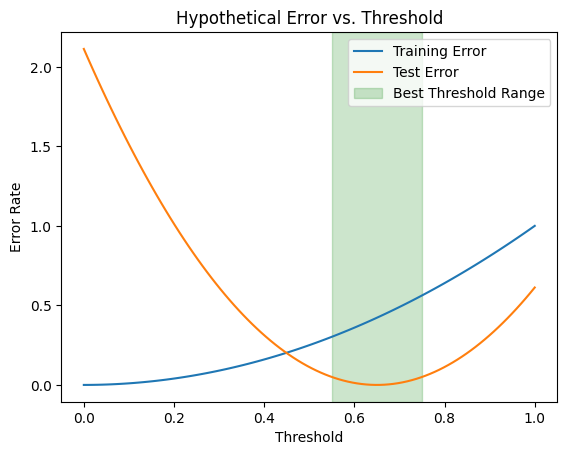

In [ ]:
def training_error(threshold):
    return threshold ** 2

def test_error(threshold):
    return 5 * ((threshold - 0.65) ** 2)

thresholds = np.linspace(1, 0, 100)

train_errors = training_error(thresholds)
test_errors = test_error(thresholds)

plt.plot(thresholds, train_errors, label='Training Error')
plt.plot(thresholds, test_errors, label='Test Error')

plt.axvspan(0.55, 0.75, alpha=0.2, color='green', label='Best Threshold Range')

plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Hypothetical Error vs. Threshold')
plt.legend()
plt.show()

When the threshold is set to zero, the decision tree will perfectly fit the training data, resulting in a training error of zero. However, this can lead to high test error when the model is applied to unseen data. As the threshold increases, the test error typically decreases until reaching a certain point. Beyond this point, increasing the threshold may cause both training and test errors to increase again. Best range can be found by using validation set as well.

## Question 2 [75 pts]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify monkey types from their images.

Your dataset consists of 5 monkey types. Images of each monkey type is stored under separate folders in the file given to you. Each class has 100 samples. So, you have 500 samples in total.

Download the dataset from the following link:
<br>
https://drive.google.com/drive/folders/1bQhd8Tm9-1OLS3VxGPWfb4wo7QHNnu_X?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries from Python Standard Library in this cell. Any other external libraries are not allowed.
import os
import itertools

Mounted at /content/drive


#### Data Loader [7 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "MonkeyDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. <b>Training (70%)</b>,
<b>validation (10%)</b> and **test (20%)** sets are given in different folders. These non-overlapping splits, which are subsets of MonkeyDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [2]:
class MonkeyDataset(Dataset):
    def __init__(self, root_dir, data_split='training'):
        self.root_dir = root_dir
        self.data_split = data_split
        self.class_folders = sorted(os.listdir(os.path.join(self.root_dir, self.data_split)))

        self.images = []
        self.labels = []
        for i, class_folder in enumerate(self.class_folders):
            class_path = os.path.join(self.root_dir, self.data_split, class_folder)
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                self.images.append(image_path)
                self.labels.append(i)

        # Image normalization
        self.transform = transforms.Compose([
            transforms.Resize(160),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image_path = self.images[index]
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image)

        label = self.labels[index]
        return image, label

def get_dataset(root):
    train_dataset = MonkeyDataset(root, data_split='training')
    val_dataset = MonkeyDataset(root, data_split='validation')
    test_dataset = MonkeyDataset(root, data_split='test')

    return train_dataset, val_dataset, test_dataset

#### Convolutional Neural Network (CNN) [8 pts]

As the given data are images, using CNNs for feature extraction will be the most beneficial way because they can easily capture the spatial features and their relationships with each other. In the following cell, you have to implement a CNN. CNN class will represent your convolutional neural network. Implement 3 layers of convolution according to following structure:
<ul>
    <li>(1) 32 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU and (3) MaxPool 3 x 3  </li>
    <li>(4) 64 filters with size of 3 x 3 with stride 1 and padding 1, 5) ReLU and (6) MaxPool 3 x 3 </li>
    <li>(7) 128 filters with size of 3 x 3 with stride 1 and padding 1, (8) ReLU and (9) MaxPool 3 x 3 </li>
</ul>

To classify using the extracted feature you need to add only one dense linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional Layers with ReLU and MaxPooling
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # (1)
            nn.ReLU(),  # (2)
            nn.MaxPool2d(kernel_size=3, stride=3),  # (3)

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # (4)
            nn.ReLU(),  # (5)
            nn.MaxPool2d(kernel_size=3, stride=3),  # (6)

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # (7)
            nn.ReLU(),  # (8)
            nn.MaxPool2d(kernel_size=3, stride=3)  # (9)
        )
        num_classes = 5

        # Dense (Linear) Layer
        self.linear_layer = nn.Linear(in_features=128 * 5 * 5, out_features=num_classes)

    def forward(self, X):
        # Pass input through convolutional layers
        out = self.conv_layers(X)

        # Flatten the output of the convolutional layers
        out = out.view(out.size(0), -1)

        # Pass through the dense layer
        out = self.linear_layer(out)

        # Apply Softmax activation
        out = F.softmax(out, dim=1)

        return out

###Stochastic Gradient Descent [20 pts.]

#### Training with SGD [10 pts]

Train your model for 100 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

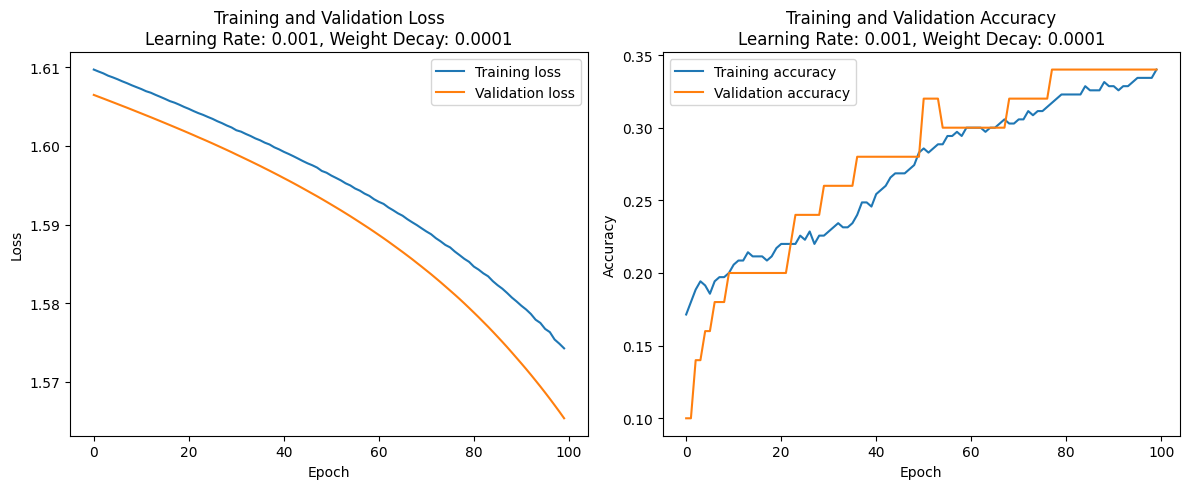

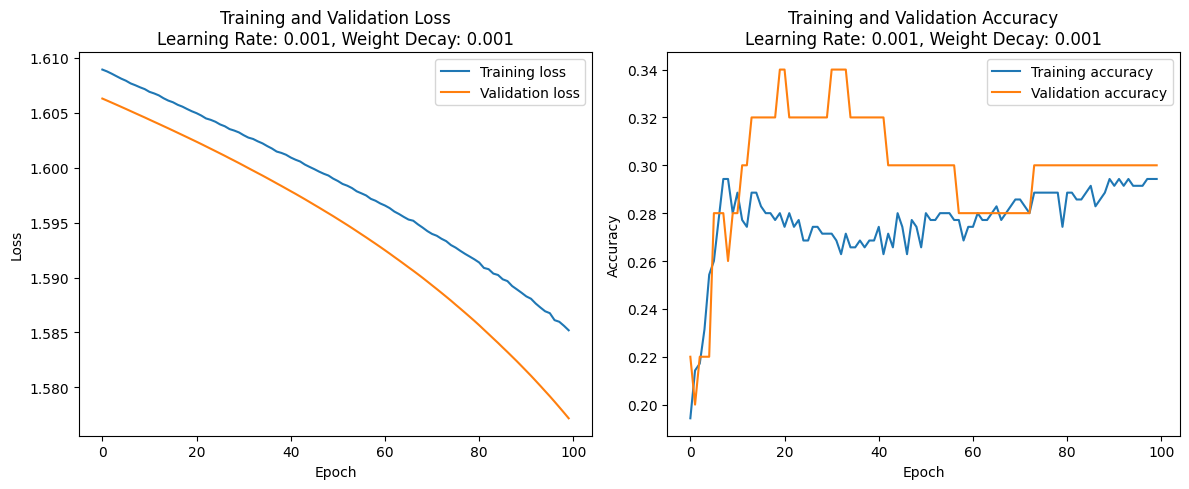

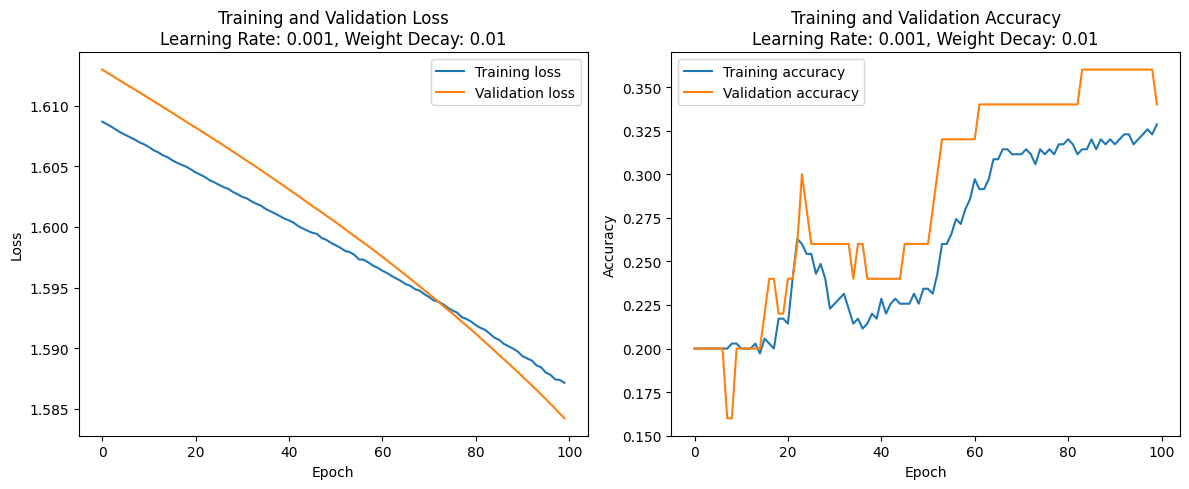

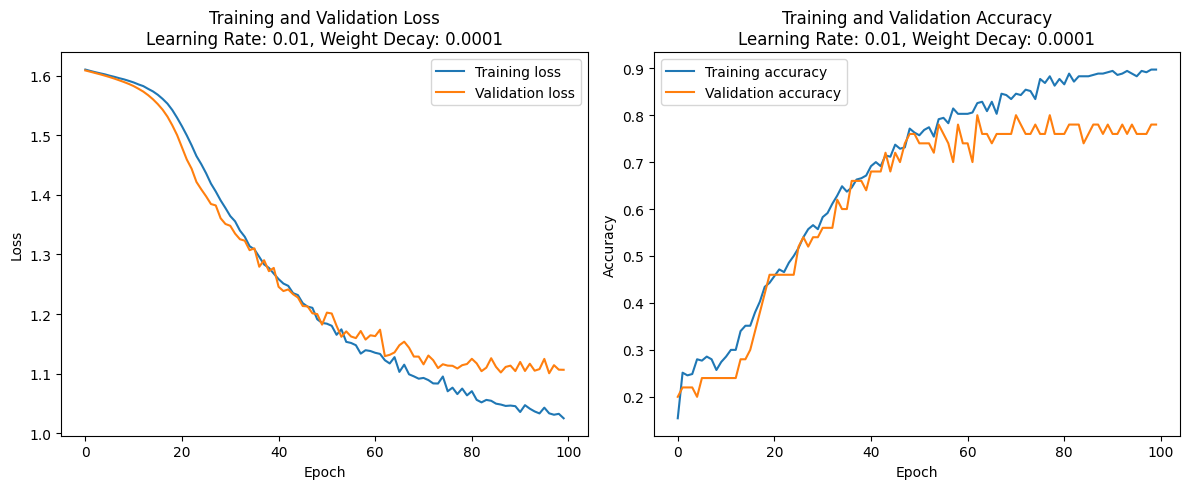

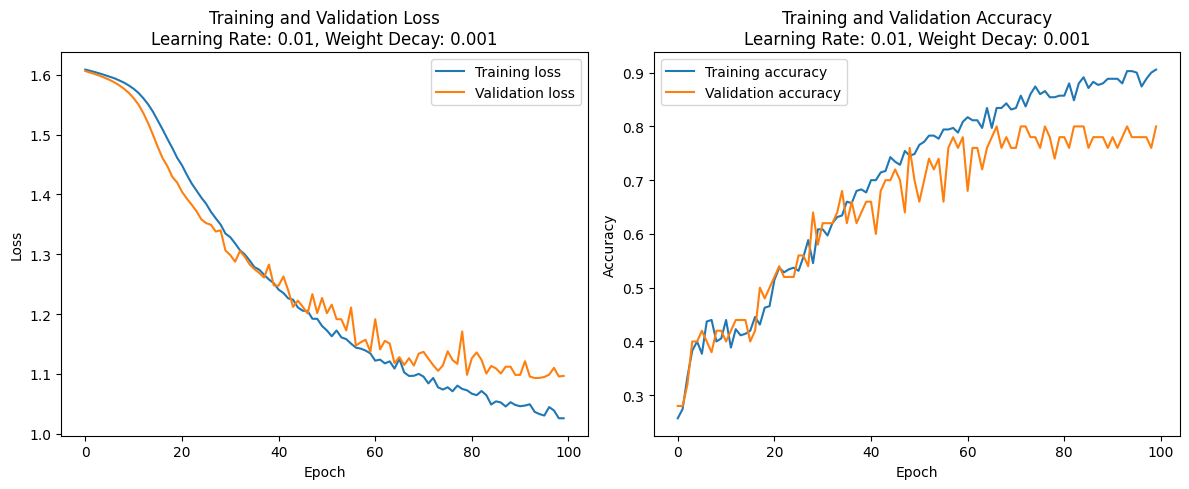

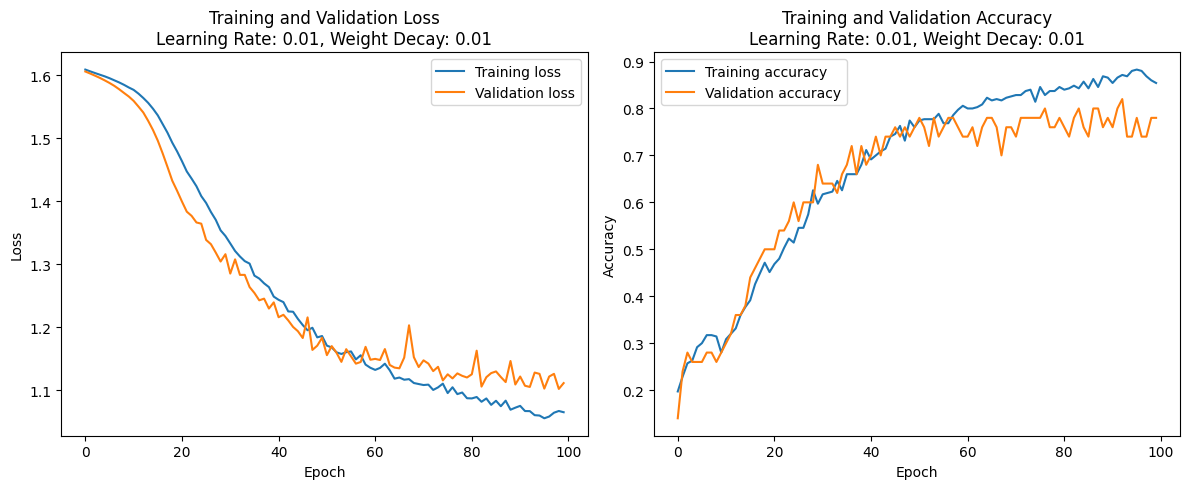

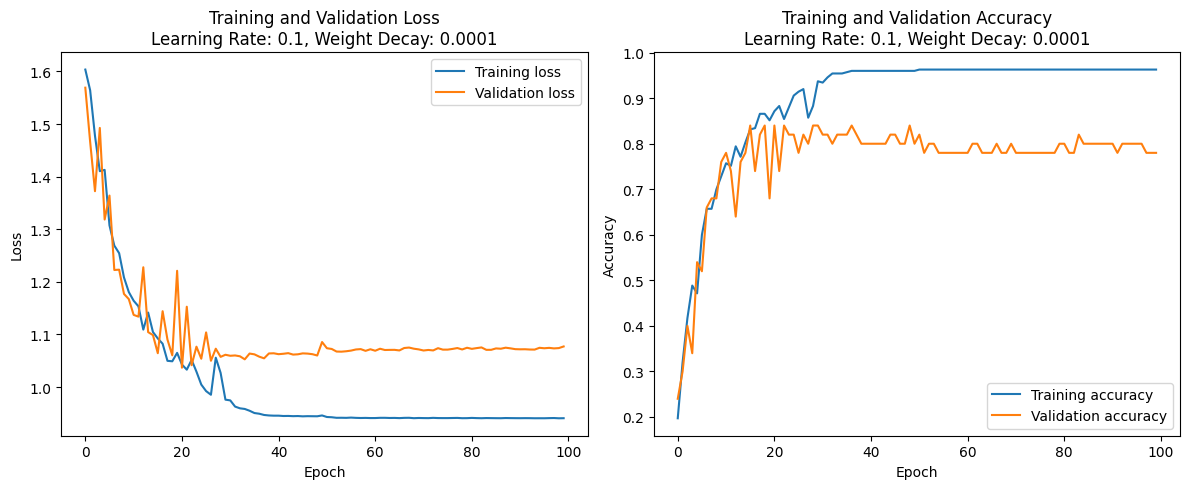

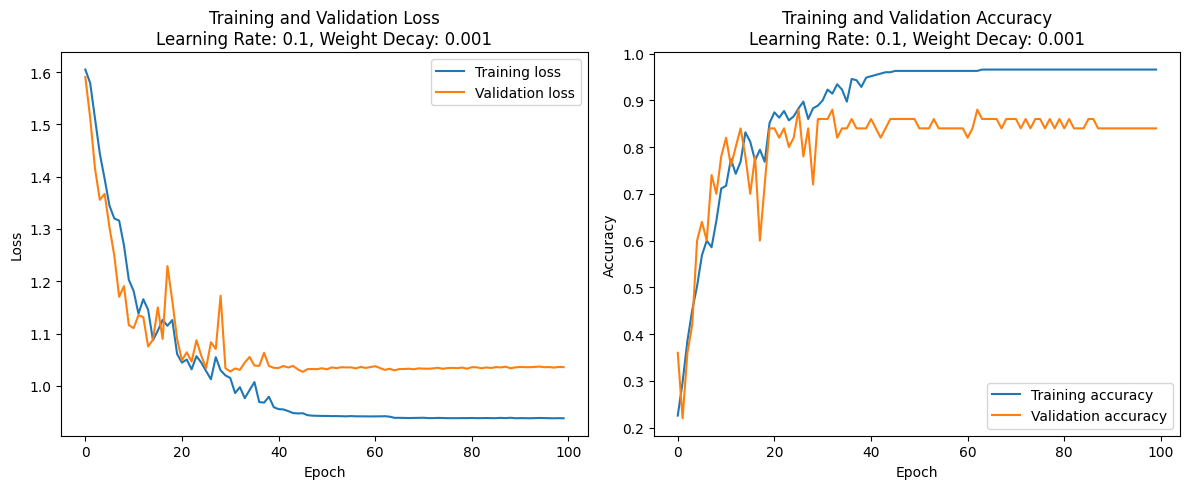

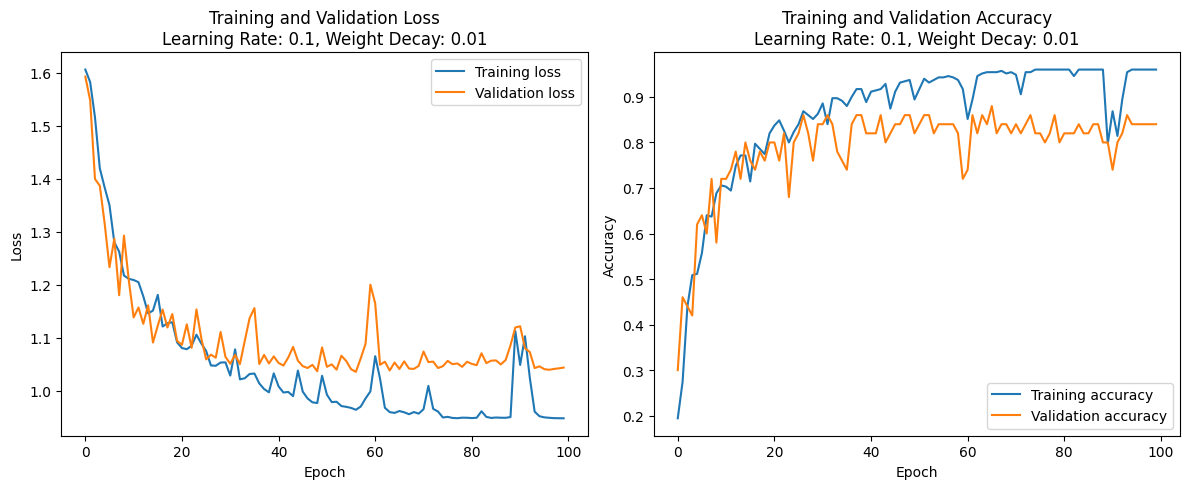

Best hyperparameters: {'learning_rate': 0.1, 'weight_decay': 0.001}


In [4]:
root_dir = '/content/drive/My Drive/hw3_dataset_monkeys'
train_dataset, val_dataset, test_dataset = get_dataset(root_dir)

batch_size = 32
num_epochs = 100

# Hyperparameters
learning_rates = [0.001, 0.01, 0.1]
weight_decays = [0.0001, 0.001, 0.01]

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

best_val_accuracy = 0.0
best_hyperparameters = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for learning_rate, weight_decay in itertools.product(learning_rates, weight_decays):
    model = CNN().to(device)

    # SGD optimizer
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Loss Function
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        train_correct = 0
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()

        # Calculate training accuracy and loss for the epoch
        train_accuracy = train_correct / len(train_loader.dataset)
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            val_loss = 0.0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            val_accuracy = correct / total
            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(val_accuracy)

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_hyperparameters['learning_rate'] = learning_rate
        best_hyperparameters['weight_decay'] = weight_decay
        torch.save(model.state_dict(), "best_cnn_sgd.pth")

    # Plot the losses and accuracies
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss\nLearning Rate: {learning_rate}, Weight Decay: {weight_decay}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training accuracy')
    plt.plot(val_accuracies, label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy\nLearning Rate: {learning_rate}, Weight Decay: {weight_decay}')
    plt.legend()

    plt.tight_layout()
    plt.show()

print(f'Best hyperparameters: {best_hyperparameters}')

Accuracy is a prevalent metric used in classification tasks, such as image classification, to assess model performance. Choosing accuracy as an evaluation metric for the validation set makes it easier to analyze and compare the performance of various models with different hyperparameter settings. It calculates a percentage of correct predictions among the total number of predictions made. Also, our TA Mehmet Alper Yılmaz recommended to use accuracy metric.

#### Test with SGD [10 pts.]
Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Mean Loss: 1.0922010838985443 
Mean Acc: 0.83 
Mean Macro Precision: 0.8466721471197175 
Mean Macro Recall: 0.8299999999999998 
Mean Macro F1 Score: 0.83133497398954


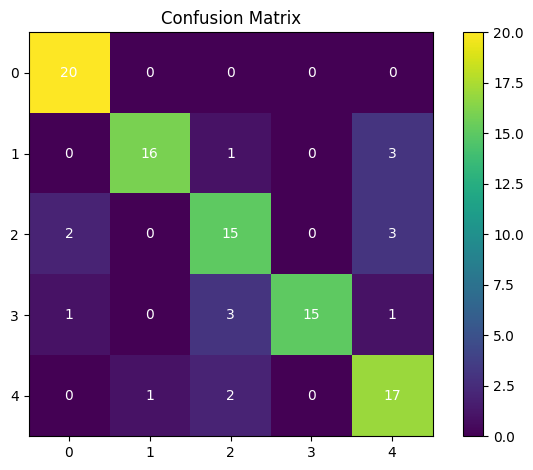

In [8]:
best_path = "/content/best_cnn_sgd.pth"
model = CNN()
model.load_state_dict(torch.load(best_path))
model.eval()

batch_size = 32
test_loader = DataLoader(test_dataset, batch_size=batch_size)

correct = 0
total = 0
true_labels = []
predicted_labels = []
losses = 0.0

criterion = nn.CrossEntropyLoss()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        losses += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate metrics
acc = correct / total
conf_matrix = confusion_matrix(true_labels, predicted_labels)
pre = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print("Mean Loss:", losses / len(test_loader), "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)

# Labels, title, and colorbar
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_xticklabels(range(5))
ax.set_yticklabels(range(5))
ax.set_title("Confusion Matrix")
fig.colorbar(im)

for i in range(5):
    for j in range(5):
        text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

###Adam Optimizer [20 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [10 pts.]

Train your model for 100 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

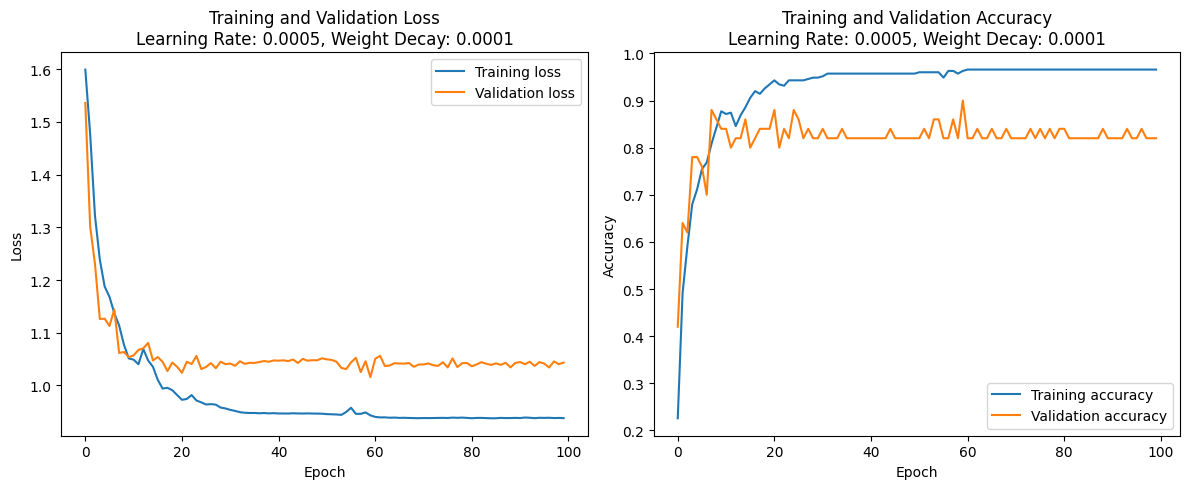

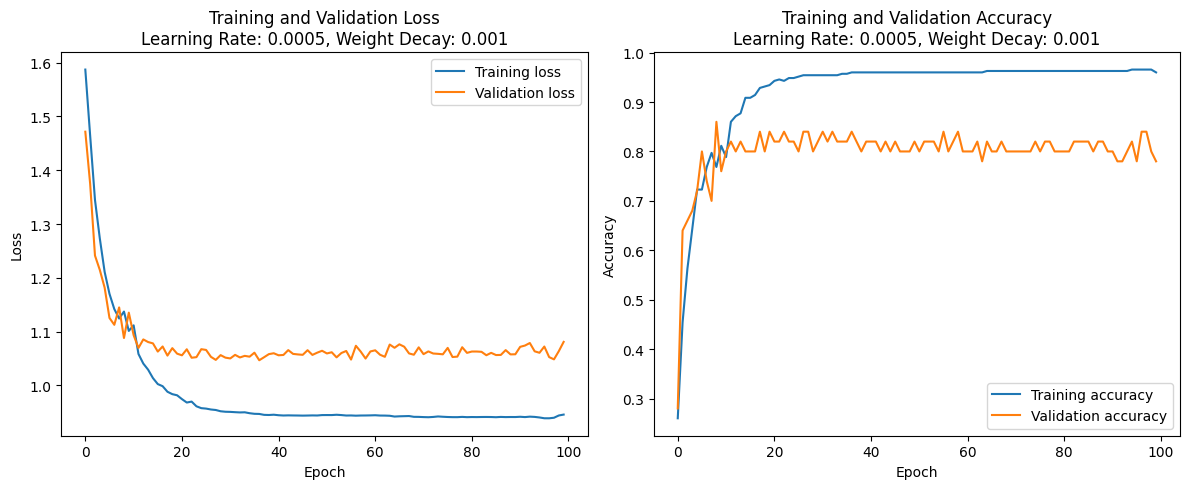

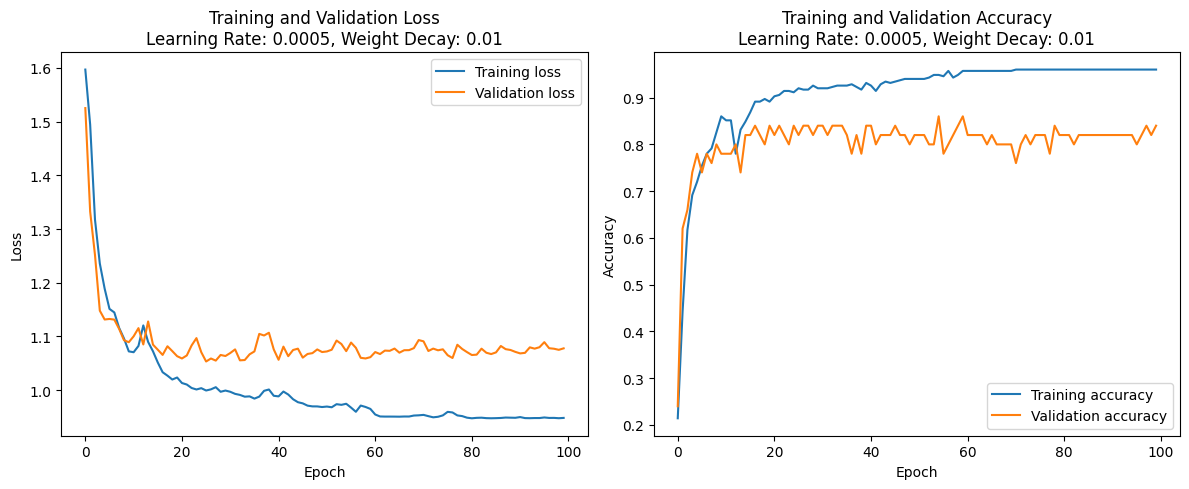

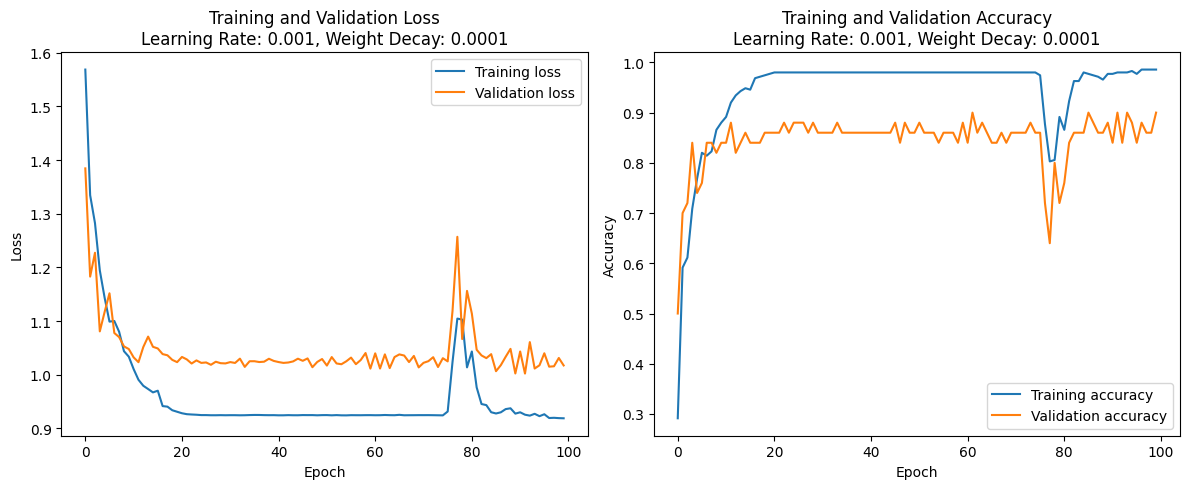

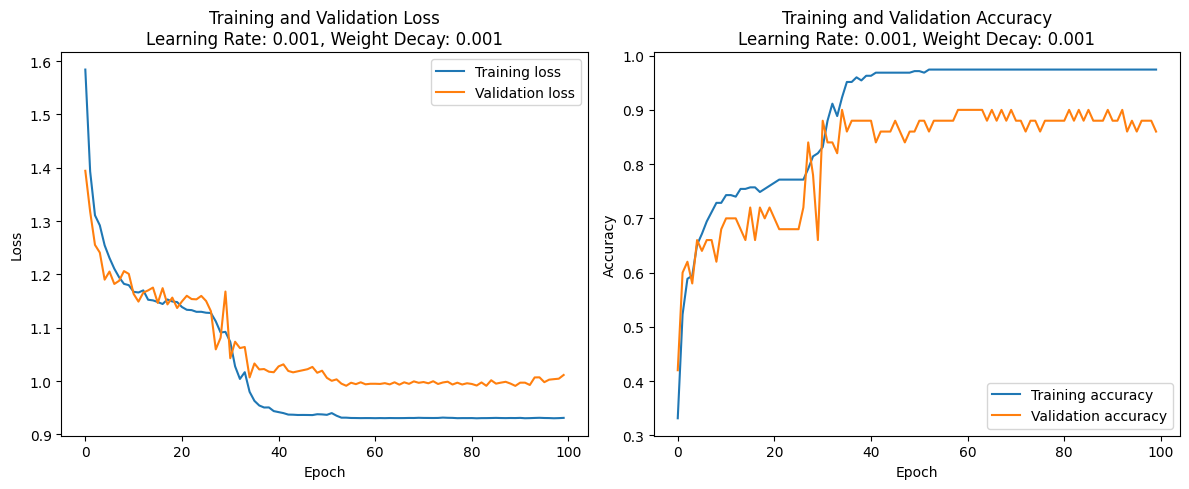

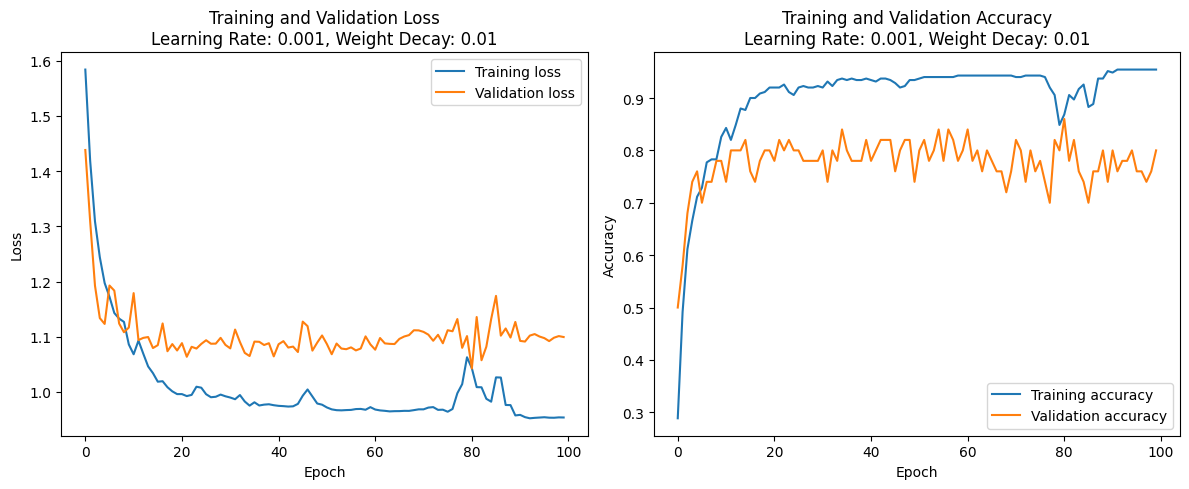

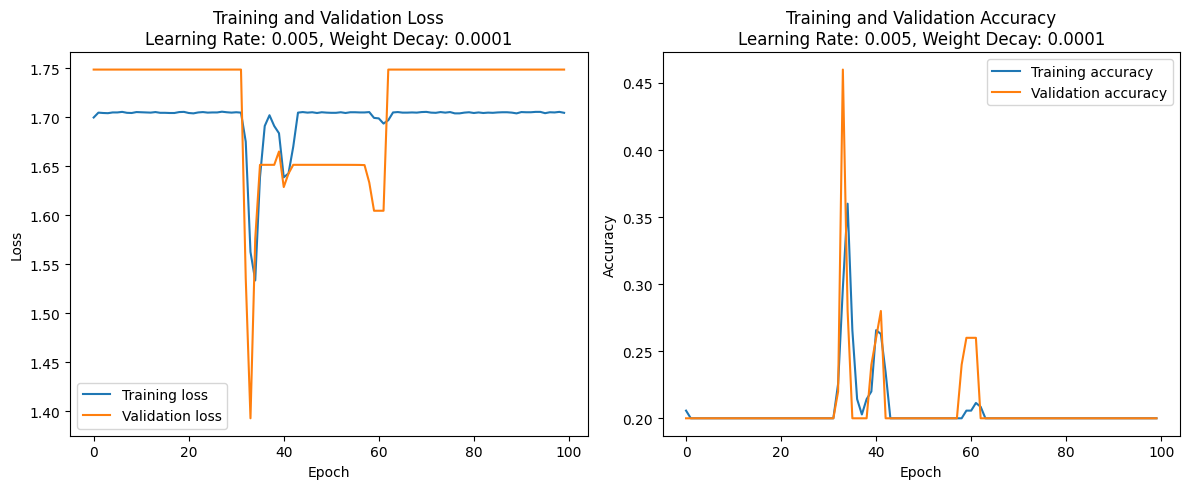

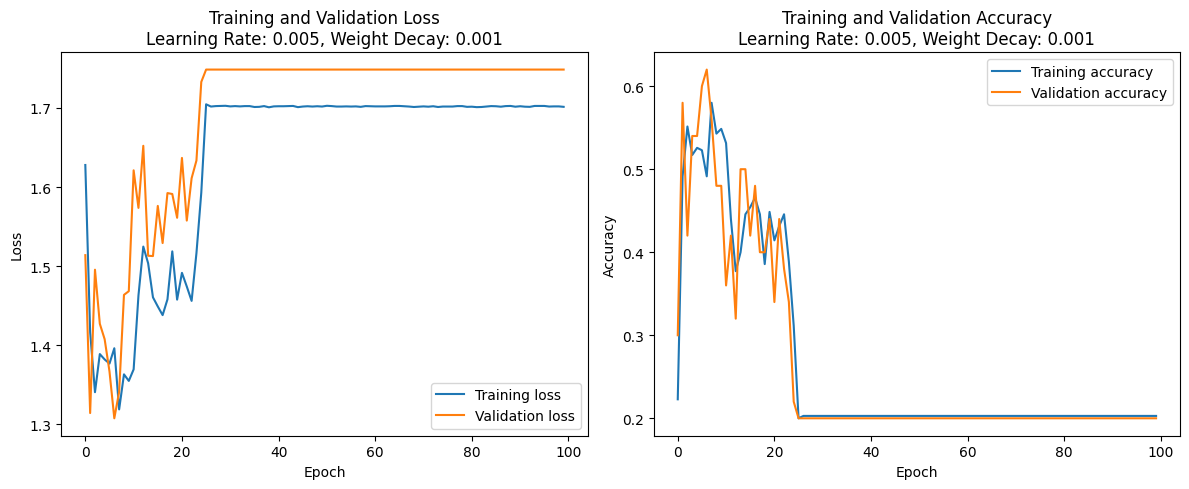

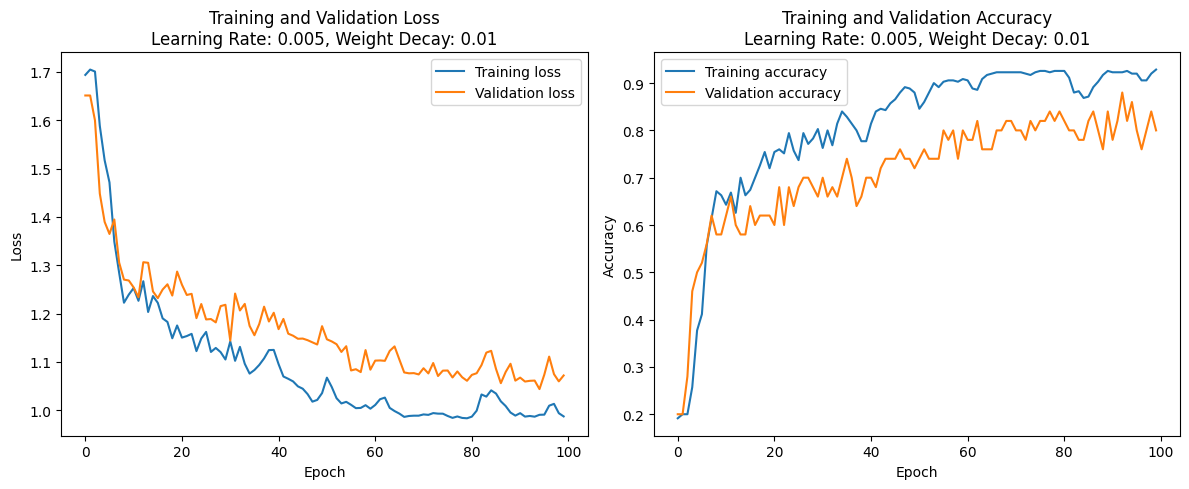

Best hyperparameters: {'learning_rate': 0.001, 'weight_decay': 0.0001}


In [12]:
root_dir = '/content/drive/My Drive/hw3_dataset_monkeys'
train_dataset, val_dataset, test_dataset = get_dataset(root_dir)

batch_size = 32
num_epochs = 100

# Hyperparameters
learning_rates = [0.0005, 0.001, 0.005]
weight_decays = [0.0001, 0.001, 0.01]

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

best_val_accuracy = 0.0
best_hyperparameters = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for learning_rate, weight_decay in itertools.product(learning_rates, weight_decays):
    model = CNN().to(device)

    # Use Adam optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Loss Function
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        train_correct = 0
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()

        # Calculate training accuracy and loss for the epoch
        train_accuracy = train_correct / len(train_loader.dataset)
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            correct = 0
            total = 0
            val_loss = 0.0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            val_accuracy = correct / total
            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(val_accuracy)

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_hyperparameters['learning_rate'] = learning_rate
        best_hyperparameters['weight_decay'] = weight_decay
        torch.save(model.state_dict(), "best_cnn_adam.pth")

    # Plot the losses and accuracies
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss\nLearning Rate: {learning_rate}, Weight Decay: {weight_decay}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training accuracy')
    plt.plot(val_accuracies, label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy\nLearning Rate: {learning_rate}, Weight Decay: {weight_decay}')
    plt.legend()

    plt.tight_layout()
    plt.show()

print(f'Best hyperparameters: {best_hyperparameters}')


Same reason with the SGD case, I've used accuracy metric. Detailed explanation of why I've used it can be found in that part.

####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Mean Loss: 0.9859780967235565 
Mean Acc: 0.89 
Mean Macro Precision: 0.9012698412698412 
Mean Macro Recall: 0.89 
Mean Macro F1 Score: 0.8891293273834993


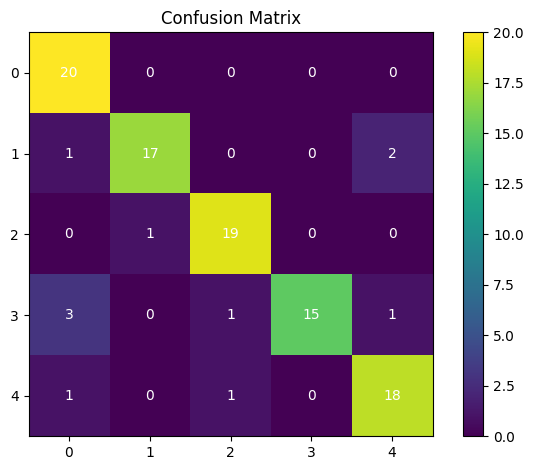

In [13]:
best_path = "/content/best_cnn_adam.pth"
model = CNN()
model.load_state_dict(torch.load(best_path))
model.eval()

batch_size = 32
test_loader = DataLoader(test_dataset, batch_size=batch_size)

correct = 0
total = 0
true_labels = []
predicted_labels = []
losses = 0.0

criterion = nn.CrossEntropyLoss()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        losses += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate metrics
acc = correct / total
conf_matrix = confusion_matrix(true_labels, predicted_labels)
pre = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print("Mean Loss:", losses / len(test_loader), "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)

# Labels, title, and colorbar
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_xticklabels(range(5))
ax.set_yticklabels(range(5))
ax.set_title("Confusion Matrix")
fig.colorbar(im)

for i in range(5):
    for j in range(5):
        text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

The figures plotted in the previous section show the training and validation loss and accuracy over epochs for different hyperparameter combinations of training and validation sets. We see that best performance at the validation set can be found with hyperparameters learning_rate: 0.001, and weight_decay: 0.0001. In the figures, we **generally** see as # of epochs increase, errors decrease and accuracies increase for train and validation sets. Note that this is not the case always.

Regarding test results, the model trained with the Adam optimizer achieved an accuracy of 0.89 on the test set, with a mean loss of 0.98. The macro-precision, macro-recall, and macro-F1 score were 0.90, 0.89, 0.88 respectively. Whereas, the model trained with the Stochastic Gradient Descent achieved an accuracy of 0.83 on the test set, with a mean loss of 1.09. The macro-precision, macro-recall, and macro-F1 score were 0.84, 0.83, 0.83 respectively.

In terms of algorithm complexity, both SGD and Adam are relatively efficient optimizers, with similar time complexities for updating model parameters. However, Adam typically converges faster due to its adaptive learning rate mechanism, which can be advantageous in training deep neural networks. Therefore, I would prefer to use Adam Optimizer over SGD for our case since it dominated SGD in terms of several metrics.


###Transfer Learning [20 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [10 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model for 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


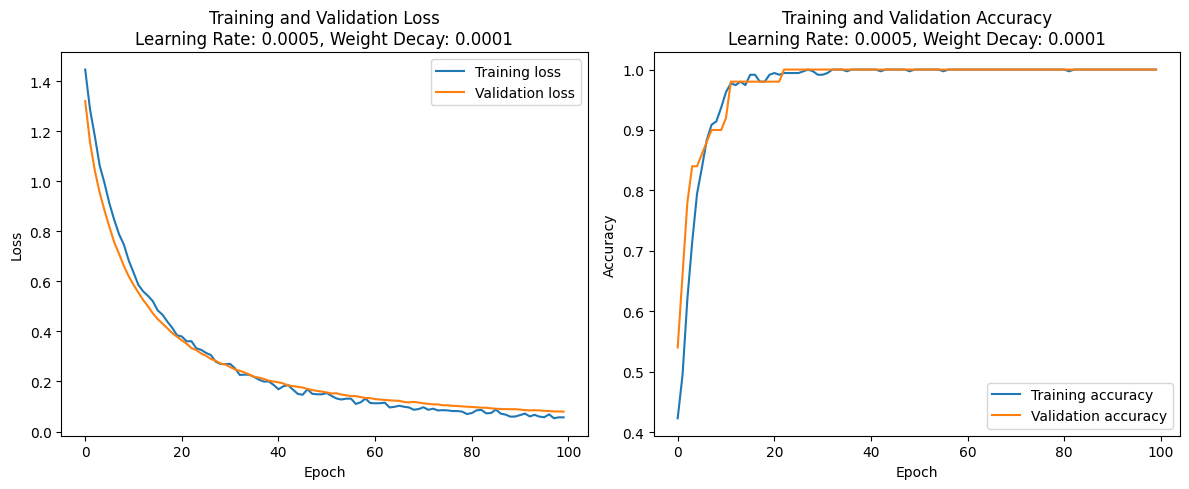

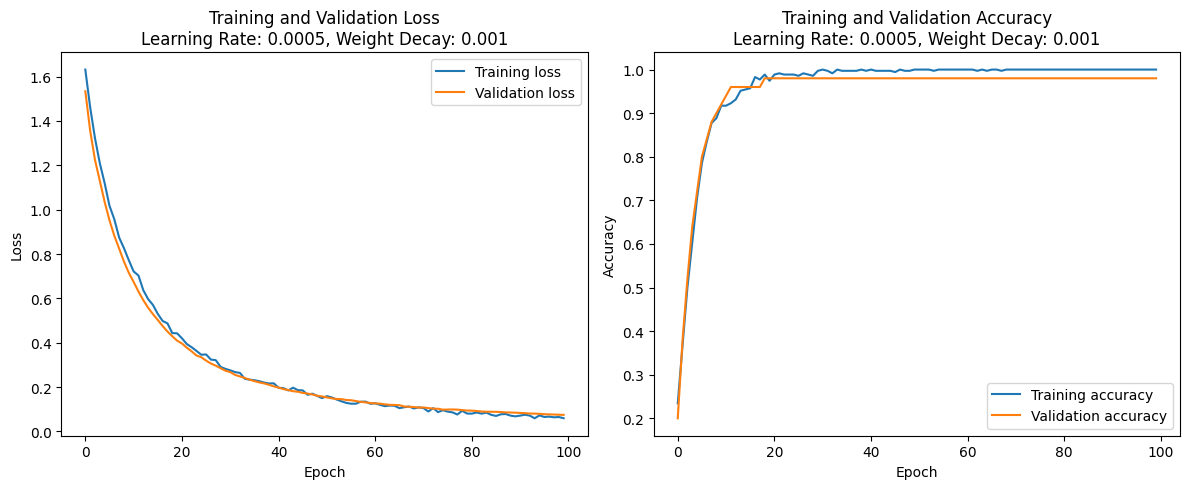

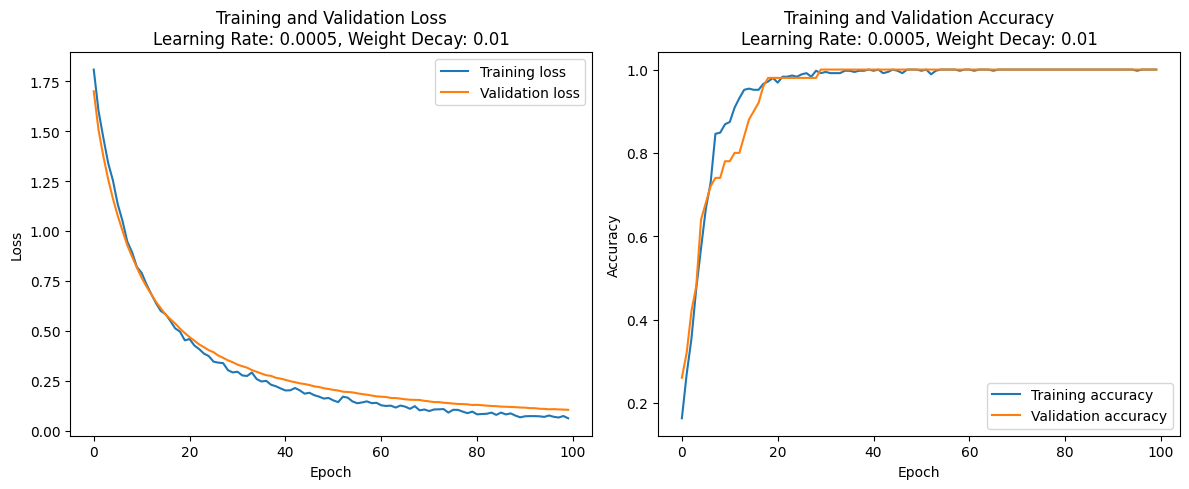

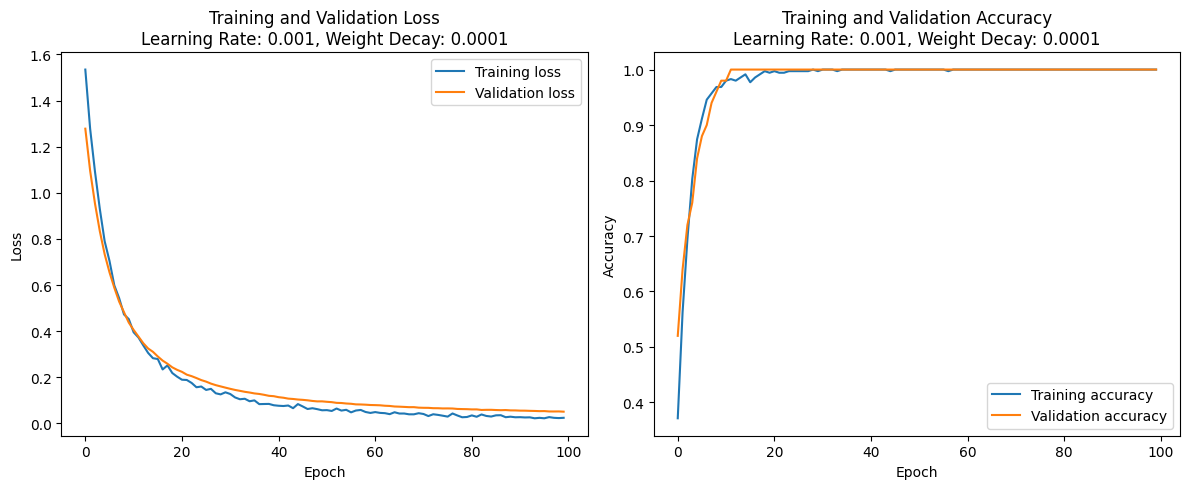

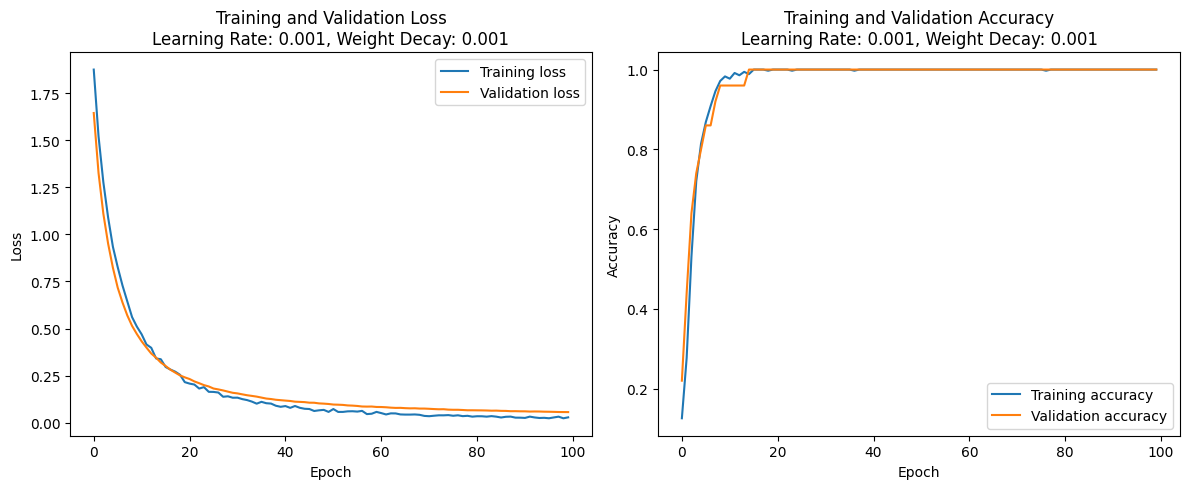

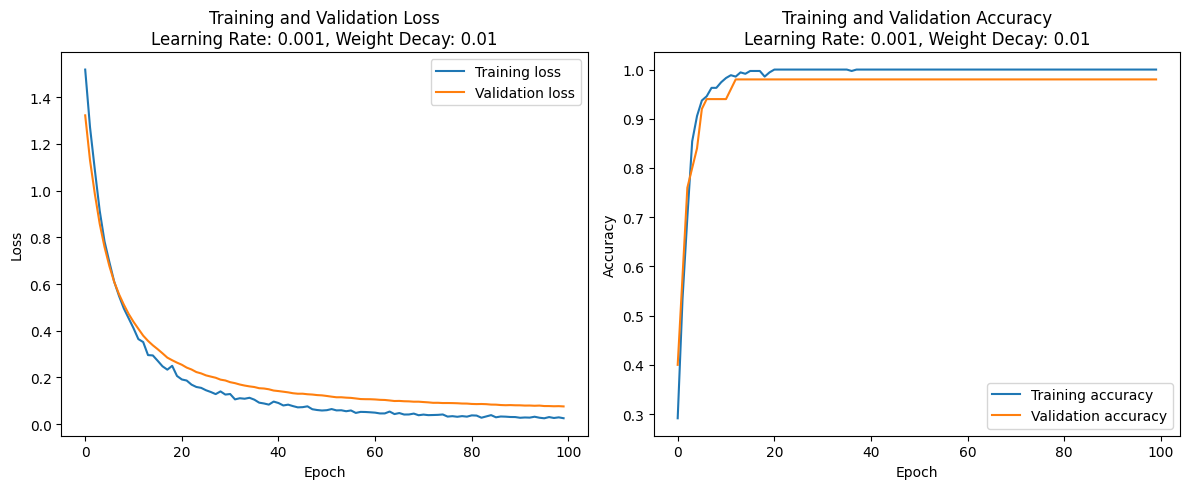

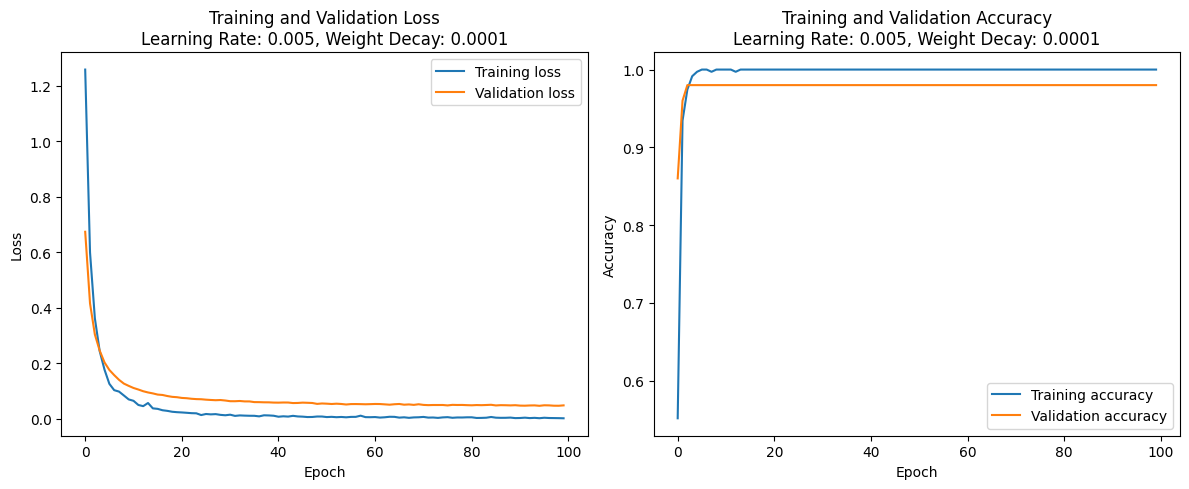

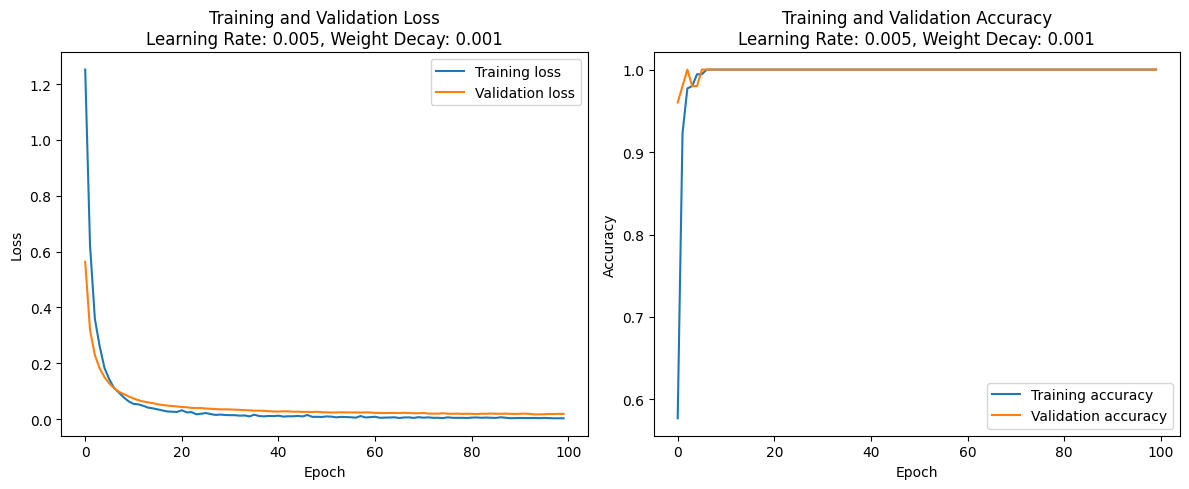

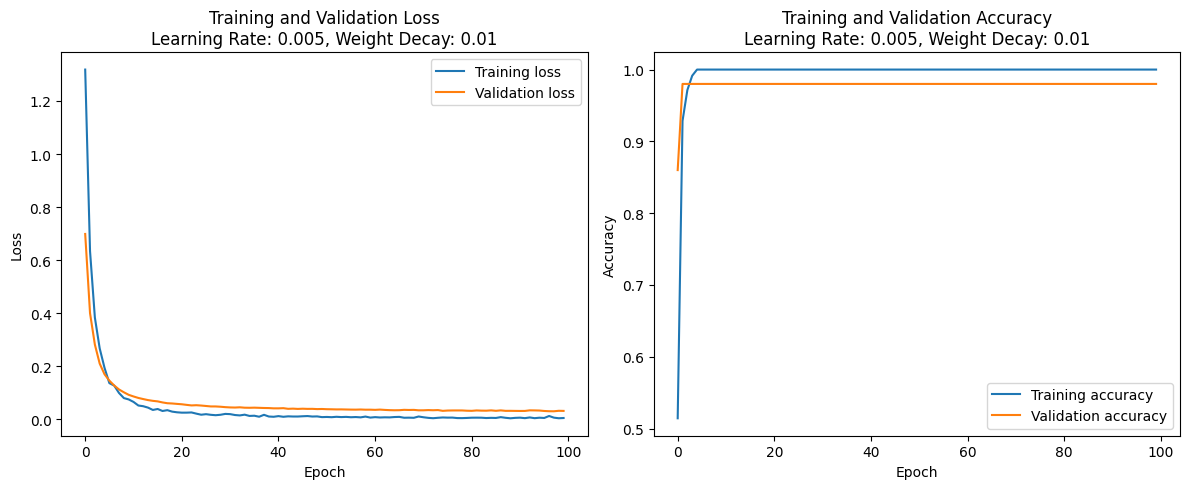

Best hyperparameters: {'learning_rate': 0.0005, 'weight_decay': 0.0001}


In [14]:
# Set up data loaders
root_dir = '/content/drive/My Drive/hw3_dataset_monkeys'
train_dataset, val_dataset, test_dataset = get_dataset(root_dir)

batch_size = 32
num_epochs = 100

# Hyperparameters
learning_rates = [0.0005, 0.001, 0.005]
weight_decays = [0.0001, 0.001, 0.01]

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

best_val_accuracy = 0.0
best_hyperparameters = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for learning_rate, weight_decay in itertools.product(learning_rates, weight_decays):
    # Initialize ResNet18 model
    model = models.resnet18(pretrained=True)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 5)  # Replace the outpu<

    # Move model to device
    model = model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Track training and validation stats
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        train_correct = 0
        train_loss = 0.0  # Initialize loss for each epoch
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()

        # Calculate training accuracy and loss for the epoch
        train_accuracy = train_correct / len(train_loader.dataset)
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            correct = 0
            total = 0
            val_loss = 0.0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            val_accuracy = correct / total
            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(val_accuracy)

    # Check if this hyperparameter combination resulted in better validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_hyperparameters['learning_rate'] = learning_rate
        best_hyperparameters['weight_decay'] = weight_decay
        torch.save(model.state_dict(), "best_cnn_transfer.pth")

    # Plot the losses and accuracies
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss\nLearning Rate: {learning_rate}, Weight Decay: {weight_decay}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training accuracy')
    plt.plot(val_accuracies, label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy\nLearning Rate: {learning_rate}, Weight Decay: {weight_decay}')
    plt.legend()

    plt.tight_layout()
    plt.show()

print(f'Best hyperparameters: {best_hyperparameters}')


Again, for the several reasons that I've explained above, I've used accuracy as a performance metric for evaluating model performance. Detailed explanation can be found above.

####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Mean Loss: 0.12083561532199383 
Mean Acc: 0.98 
Mean Macro Precision: 0.9804761904761904 
Mean Macro Recall: 0.9800000000000001 
Mean Macro F1 Score: 0.9799937460913071


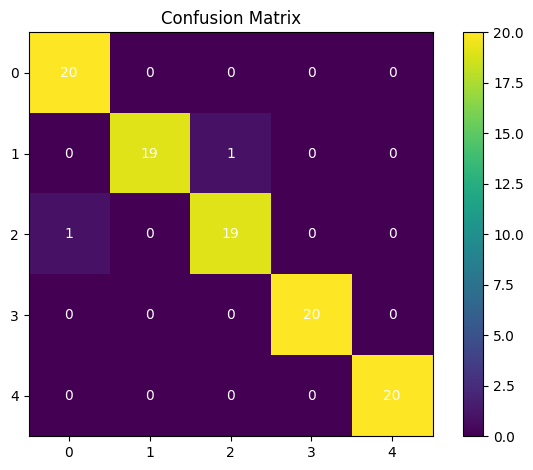

In [17]:
# Test CNN
best_path = "/content/best_cnn_transfer.pth"
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 5)
model.load_state_dict(torch.load(best_path))  # Load the saved weights
model.eval()  # Set model to evaluation mode

batch_size = 32
test_loader = DataLoader(test_dataset, batch_size=batch_size)

correct = 0
total = 0
true_labels = []
predicted_labels = []
losses = 0.0

criterion = nn.CrossEntropyLoss()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)  # Calculate loss too
        losses += loss.item()  # Keep a running total
        _, predicted = torch.max(outputs.data, 1)  # Get predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect labels for metrics
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate metrics
acc = correct / total
conf_matrix = confusion_matrix(true_labels, predicted_labels)
pre = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print("Mean Loss:", losses / len(test_loader), "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)

# Labels, title, and colorbar
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_xticklabels(range(5))
ax.set_yticklabels(range(5))
ax.set_title("Confusion Matrix")
fig.colorbar(im)

# Loop over data dimensions and create text annotations.
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

Transfer learning offers various advantages over training a model from scratch. Transfer learning, which uses features learnt from prior tasks, can dramatically minimize the time required to adapt a model to a new task. Furthermore, because they have learnt general features from huge datasets, pretrained models can typically outperform new tasks, especially when labeled data is restricted. This holds for our case too. As you can see from the figures, transfer learning's both error and accuracy plots rapidly converge.

The ability to generalize well to new tasks with smaller datasets is a significant benefit of transfer learning. Hence, it is better to use pre-trained model for our case as you can infer from the plots.